In [1]:
import numpy as np
import pandas as pd
import random

import os
import cv2

from pathlib import Path 

import matplotlib.pyplot as plt

In [2]:
HOME_DIR = str(Path.home())
HICO_IMAGE_DIR = os.path.join(HOME_DIR, "projectdata/cht01/hico_20160224_det/images/train2015")

# Load detected result data

In [52]:
f_det_human_all = 'det_human_all_concat.csv'
f_det_obj_all = 'det_obj_all_concat.csv'

df_det_human_all = pd.DataFrame.from_csv(f_det_human_all)
df_det_obj_all = pd.DataFrame.from_csv(f_det_obj_all)

In [53]:
df_det_obj_all['obj_class_id'] = df_det_obj_all['obj_class_id'].astype(np.int)

df_det_human_all['human_bbox'] = df_det_human_all['human_bbox'].apply(lambda x: list(map(int,x.strip('[]').split(',')))) # str to list
df_det_obj_all['obj_bbox'] = df_det_obj_all['obj_bbox'].apply(lambda x: list(map(int,x.strip('[]').split(',')))) # str to list

# View detected data

In [5]:
print(df_det_human_all.shape)
print(df_det_obj_all.shape)

(1826510, 3)
(1608926, 4)


In [6]:
df_det_human_all.head()

,human_bbox,human_score,img_name
0,"[173, 569, 15, 337]",0.996160,HICO_train2015_00035534.jpg
1,"[163, 573, 17, 332]",0.991567,HICO_train2015_00035534.jpg
2,"[170, 564, 12, 329]",0.990684,HICO_train2015_00035534.jpg
3,"[166, 565, 9, 340]",0.988741,HICO_train2015_00035534.jpg
4,"[169, 574, 0, 342]",0.983869,HICO_train2015_00035534.jpg


In [7]:
df_det_obj_all.head()

,img_name,obj_bbox,obj_class_id,obj_score
0,HICO_train2015_00020891.jpg,"[158, 545, 24, 405]",8,0.990819
1,HICO_train2015_00020891.jpg,"[167, 540, 28, 402]",8,0.988644
2,HICO_train2015_00020891.jpg,"[182, 545, 22, 406]",8,0.984921
3,HICO_train2015_00020891.jpg,"[153, 531, 31, 400]",8,0.982876
4,HICO_train2015_00020891.jpg,"[147, 533, 41, 371]",8,0.978667


## get images of intersection between human and object data

In [8]:
# get images exist in both dataframe (human & object)
det_intersect_img = np.intersect1d(
    df_det_human_all['img_name'].unique(),
    df_det_obj_all['img_name'].unique()
)

In [9]:
det_intersect_img.shape

(36322,)

# draw image with detected data

[[233, 640, 0, 141], [246, 631, 3, 141], [253, 635, 0, 139], [233, 638, 5, 144], [247, 640, 1, 145], [246, 640, 5, 136], [255, 640, 5, 147], [234, 640, 3, 131], [268, 640, 3, 150], [227, 640, 0, 135], [248, 636, 0, 130], [219, 640, 6, 141], [268, 640, 1, 143], [235, 635, 0, 123], [232, 636, 1, 118], [293, 640, 1, 144], [214, 640, 4, 136]]
[[9, 632, 61, 457], [39, 632, 48, 475], [18, 640, 38, 459], [31, 625, 55, 455], [13, 638, 49, 451], [206, 283, 166, 297], [79, 145, 38, 169], [271, 329, 42, 151], [81, 145, 43, 169], [81, 144, 36, 170], [205, 284, 168, 300], [83, 144, 46, 167], [13, 637, 29, 465], [80, 145, 41, 166], [82, 144, 37, 167], [509, 639, 221, 343], [83, 143, 51, 167], [0, 622, 66, 469], [84, 146, 51, 167], [506, 640, 221, 341], [271, 330, 41, 154], [508, 639, 224, 339], [82, 142, 39, 165], [128, 183, 64, 150], [84, 146, 58, 169], [83, 141, 58, 165], [326, 373, 424, 446], [80, 143, 39, 165], [82, 141, 48, 166], [83, 146, 50, 172], [28, 640, 57, 446], [38, 640, 59, 465], [327,

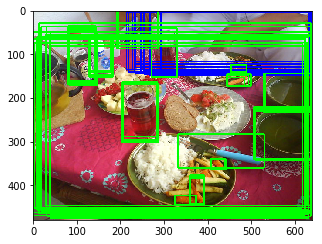

In [10]:
for img in det_intersect_img[1:2]:
    df_det_human = df_det_human_all[df_det_human_all['img_name'] == img]
    df_det_obj = df_det_obj_all[df_det_obj_all['img_name'] == img]
    
    # get bboxs
    human_bboxs = df_det_human['human_bbox'].tolist()
    obj_bboxs = df_det_obj['obj_bbox'].tolist()
    print(human_bboxs)
    print(obj_bboxs)
    
    # load image
    image_path = os.path.join(HICO_IMAGE_DIR, img)
    input_img = cv2.imread(image_path)
    RGB_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    
    # draw human bboxs
    for i in range(len(human_bboxs)):    
        h_bbox = human_bboxs[i]
        cv2.rectangle(RGB_img, 
                      (h_bbox[0], h_bbox[2]), 
                      (h_bbox[1], h_bbox[3]), 
                      (0,0,255), 2)
        
    # draw object bboxs
    for i in range(len(obj_bboxs)):    
        o_bbox = obj_bboxs[i]
        cv2.rectangle(RGB_img, 
                      (o_bbox[0], o_bbox[2]), 
                      (o_bbox[1], o_bbox[3]), 
                      (0,255,0), 2)
    

    # show image and bbox
    fig = plt.figure(figsize=(5,5))
#     plt.title('object : {}'.format('human'))
    plt.imshow(RGB_img)
    plt.show()
    
    break

# get positive data by gt and det data

## load gt data

In [54]:
gt_data_path = os.path.join(HOME_DIR, "HICO/hico_det/anno_box_train.csv")

In [55]:
df_gt_data = pd.DataFrame.from_csv(gt_data_path)
df_gt_data['human_bbox'] = df_gt_data['human_bbox'].apply(lambda x: list(map(int,x.strip('[]').split(',')))) # str to list
df_gt_data['obj_bbox'] = df_gt_data['obj_bbox'].apply(lambda x: list(map(int,x.strip('[]').split(',')))) # str to list

In [56]:
df_gt_data.head()

,action_no,human_bbox,img_size,name,obj_bbox
0,153,"[208, 427, 33, 300]","[640, 480, 3]",HICO_train2015_00000001.jpg,"[59, 572, 98, 405]"
1,154,"[213, 438, 20, 357]","[640, 480, 3]",HICO_train2015_00000001.jpg,"[77, 583, 115, 396]"
2,155,"[206, 427, 33, 306]","[640, 480, 3]",HICO_train2015_00000001.jpg,"[61, 571, 100, 401]"
3,156,"[209, 444, 26, 317]","[640, 480, 3]",HICO_train2015_00000001.jpg,"[59, 579, 99, 395]"
4,224,"[262, 638, 1, 138]","[640, 480, 3]",HICO_train2015_00000002.jpg,"[162, 258, 131, 165]"


In [57]:
df_gt_data.shape

(117871, 5)

## Create positive bbox proposals

In [18]:
# area of overlap / area of union
def CalculateIoU(bbox1, bbox2):
    b1_x1, b1_x2, b1_y1, b1_y2 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    b2_x1, b2_x2, b2_y1, b2_y2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]
    
    b1_w = b1_x2 - b1_x1
    b2_w = b2_x2 - b2_x1
    x_start = min(b1_x1, b2_x1)
    x_end = max(b1_x2, b2_x2)
    iou_w = max(0, b1_w + b2_w - (x_end - x_start))
    
    b1_h = b1_y2 - b1_y1
    b2_h = b2_y2 - b2_y1
    y_start = min(b1_y1, b2_y1)
    y_end = max(b1_y2, b2_y2)
    iou_h = max(0, b1_h + b2_h - (y_end - y_start))
    
    overlap = iou_w * iou_h
    
    bbox1_area = b1_w * b1_h
    bbox2_area = b2_w * b2_h
    union = (bbox1_area + bbox2_area) - overlap
        
    return overlap / union

In [34]:
def GeneratePositiveExample(image_name, gt_h_bbox, gt_o_bbox, iou_threshold=0.5):
    # get det bboxs by img name
    df_det_human = df_det_human_all[df_det_human_all['img_name'] == image_name]
    det_human_bboxs = df_det_human['human_bbox']
    df_det_obj = df_det_obj_all[df_det_obj_all['img_name'] == image_name]
    det_obj_bboxs = df_det_obj['obj_bbox']
    
    # get IoUs of gt bbox and det bboxs
    h_ious = det_human_bboxs.apply(lambda x: CalculateIoU(x, gt_h_bbox))
    o_ious = det_obj_bboxs.apply(lambda x: CalculateIoU(x, gt_o_bbox))
    
    # get those match det bboxs with high IoU det bboxs
    match_h_bboxs = det_human_bboxs[h_ious > iou_threshold].tolist()
    match_h_bboxs.append(gt_h_bbox)
    match_o_bboxs = det_obj_bboxs[o_ious > iou_threshold].tolist()
    match_o_bboxs.append(gt_o_bbox)
    
    # random select one match_det_h_bbox and one match_det_o_bbox
    choice_h_bbox = random.choice(match_h_bboxs)
    choice_o_bbox = random.choice(match_o_bboxs)
    
#     print(det_human_bboxs)
#     print(det_obj_bboxs)
#     print(h_ious)
#     print(o_ious)
#     print(match_h_bboxs)
#     print(match_o_bboxs)
#     print(choice_h_bbox, choice_o_bbox)
    
#     return choice_h_bbox, choice_o_bbox
    return [(image_name, x, y) for x in match_h_bboxs for y in match_o_bboxs]

### test function

In [32]:
p_h_bbox, p_o_bbox = GeneratePositiveExample('HICO_train2015_00000001.jpg', [208, 427, 33, 300], [59, 572, 98, 405], 0.7)
print(p_h_bbox, p_o_bbox)

[202, 436, 38, 298] [68, 575, 82, 401]


In [39]:
GeneratePositiveExample('HICO_train2015_00000001.jpg', [208, 427, 33, 300], [59, 572, 98, 405], 0.95)

[('HICO_train2015_00000001.jpg', [208, 427, 33, 300], [60, 572, 92, 407]),
 ('HICO_train2015_00000001.jpg', [208, 427, 33, 300], [70, 566, 98, 404]),
 ('HICO_train2015_00000001.jpg', [208, 427, 33, 300], [59, 572, 98, 405])]

### generate proposals

In [49]:
df_gt_data.columns

Index(['action_no', 'human_bbox', 'img_size', 'name', 'obj_bbox'], dtype='object')

In [61]:
from ast import literal_eval as make_tuple

p_name = []
p_h_bbox = []
p_o_bbox = []
for i in range(len(df_gt_data[:10])):
   
    image_name = df_gt_data['name'][i]
    gt_h_bbox  = df_gt_data['human_bbox'][i]
    gt_o_bbox  = df_gt_data['obj_bbox'][i]
    
    a = GeneratePositiveExample(image_name, gt_h_bbox, gt_o_bbox, 0.9)
    for name, x, y in a:
        p_name.append(name)
        p_h_bbox.append(x)
        p_o_bbox.append(y)

MRCNN_pp_train = pd.DataFrame({'p_name'   : p_name,
                               'p_h_bbox' : p_h_bbox,
                               'p_o_bbox' : p_o_bbox
                              })       

In [62]:
MRCNN_pp_train.head()

,p_h_bbox,p_name,p_o_bbox
0,"[210, 431, 22, 306]",HICO_train2015_00000001.jpg,"[60, 572, 92, 407]"
1,"[210, 431, 22, 306]",HICO_train2015_00000001.jpg,"[70, 568, 86, 408]"
2,"[210, 431, 22, 306]",HICO_train2015_00000001.jpg,"[70, 566, 98, 404]"
3,"[210, 431, 22, 306]",HICO_train2015_00000001.jpg,"[68, 575, 82, 401]"
4,"[210, 431, 22, 306]",HICO_train2015_00000001.jpg,"[77, 570, 92, 401]"
